<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

In [1]:
import re

regex = '[^가-힣0-9 ]'
txt = "코드스테이츠 AI부트캠프 7개월 과정, 모두 화이팅입니다!"
result = re.sub(regex, "", txt)
result

'코드스테이츠 부트캠프 7개월 과정 모두 화이팅입니다'

## 1. 데이터 전처리 (Text preprocessing)

In [1]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [3]:
df.head(10)

,Unnamed: 0,title,company,description,url
0,0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
1,1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
2,2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
3,3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
4,4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,https://www.indeed.com/viewjob?jk=422a9c487215...
5,5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...,https://www.indeed.com/viewjob?jk=4bff8a12d5ce...
6,6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...",https://www.indeed.com/viewjob?jk=90f7a420e89b...
7,7,"Data Product Engineer, Revenue Science",Twitter,"By applying for this role, you could choose to...",https://www.indeed.com/viewjob?jk=230fa72e4305...
8,8,Data Science Internship: Python,Hitachi Vantara,"The Company\n\nHitachi Vantara, a wholly-owned...",https://www.indeed.com/viewjob?jk=763c19370ffd...
9,9,"Data Product Engineer, Revenue Science",Twitter,"By applying for this role, you could choose to...",https://www.indeed.com/viewjob?jk=230fa72e4305...


In [4]:
df = df.drop(['Unnamed: 0','url'], axis=1) #컬럼 제거

In [5]:
df = df.drop_duplicates(ignore_index = True) #중복값 제거

In [6]:
df.head(10)

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
2,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...
4,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell..."
5,"Data Product Engineer, Revenue Science",Twitter,"By applying for this role, you could choose to..."
6,Data Science Internship: Python,Hitachi Vantara,"The Company\n\nHitachi Vantara, a wholly-owned..."
7,Data Scientist,Lime,Remote Friendly (US / CA). As long as you are ...
8,Water Utility Data Scientist,American States Water Company,"We are an Equal Opportunity Employer. Women, m..."
9,Data Scientist,Colas Inc. (100),Subsidiary: Colas Inc. (100)\n\nColas Inc. is ...


In [7]:
df.shape

(757, 3)

### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [8]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [9]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].tail() 

752    [our, expert, delivery, , business, intelligen...
753    [music, for, everyone, no, credit, card, neede...
754    [senior, data, , applied, scientist, , do, you...
755    [ebay, is, a, global, commerce, leader, that, ...
756    [tldr, , spring, is, accelerating, the, discov...
Name: tokens, dtype: object

### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [10]:
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
df['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(10)

[('and', 21864),
 ('', 21493),
 ('to', 12694),
 ('the', 10538),
 ('of', 8839),
 ('data', 7425),
 ('in', 6769),
 ('a', 6436),
 ('with', 5727),
 ('for', 4132)]

In [11]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [12]:
wc = word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
225,and,755,21864,1.0,0.053487,0.053487,0.997358
0,,751,21493,2.0,0.052580,0.106067,0.992074
95,to,754,12694,3.0,0.031054,0.137121,0.996037
163,the,745,10538,4.0,0.025780,0.162901,0.984148
201,of,745,8839,5.0,0.021623,0.184524,0.984148


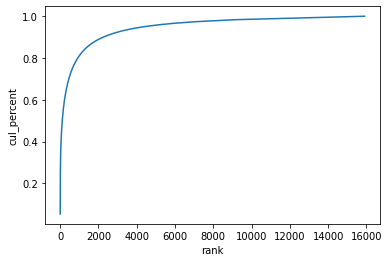

In [13]:
import seaborn as sns

# 누적 비율 시각화 
sns.lineplot(x='rank', y='cul_percent', data=wc);

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [14]:
STOP_WORDS = nlp.Defaults.stop_words.union(['data', 'work'])

In [15]:
tokens2 = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = []
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens2.append(doc_tokens)

df['cleaning_tokens'] = tokens2
df['cleaning_tokens']

0      [job, details, \n, description, \n, essential,...
1      [team, member, finance, internal, audit, depar...
2      [overview:, \n, american, credit, acceptance, ...
3      [j.p., morgan's, corporate, &, investment, ban...
4      [vystar,, offer, competitive, pay,, excellent,...
                             ...                        
752    [expert, delivery, &, business, intelligence, ...
753    [music, everyone,, credit, card, needed., it’s...
754    [senior, &, applied, scientist, \n, passion, m...
755    [ebay, global, commerce, leader, allows, shape...
756    [tl;dr, \n, spring, accelerating, discovery, t...
Name: cleaning_tokens, Length: 757, dtype: object

In [16]:
wc = word_count(df['cleaning_tokens'])
wc.head(12) #상위 10개 토큰 

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
201,\n,732,15158,1.0,0.057309,0.057309,0.966975
208,\n\n,607,3904,2.0,0.014760,0.072069,0.801849
51,experience,687,3055,3.0,0.011550,0.083619,0.907530
485,business,518,1885,4.0,0.007127,0.090746,0.684280
115,team,548,1323,5.0,0.005002,0.095748,0.723910
511,learning,467,1193,6.0,0.004510,0.100259,0.616909
271,machine,468,1140,7.0,0.004310,0.104569,0.618230
717,science,460,1048,8.0,0.003962,0.108531,0.607662
155,ability,452,958,9.0,0.003622,0.112153,0.597094
170,analysis,436,896,10.0,0.003388,0.115540,0.575958


### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [17]:
df.head()

,title,company,description,tokens,cleaning_tokens
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,"[job, details, , description, , essential, dut...","[job, details, \n, description, \n, essential,..."
1,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,"[as, a, team, member, in, the, finance, and, i...","[team, member, finance, internal, audit, depar..."
2,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,"[overview, , american, credit, acceptance, see...","[overview:, \n, american, credit, acceptance, ..."
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...,"[jp, morgans, corporate, , investment, bank, c...","[j.p., morgan's, corporate, &, investment, ban..."
4,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...","[at, vystar, we, offer, competitive, pay, an, ...","[vystar,, offer, competitive, pay,, excellent,..."


In [18]:
# 표제어 추출
tokens3 = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = []
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.lemma_.lower())
    tokens3.append(doc_tokens)

df['lemma_tokens'] = tokens3
df['lemma_tokens'].head()

0    [job, details, \n, description, \n, essential,...
1    [team, member, finance, internal, audit, depar...
2    [overview:, \n, american, credit, acceptance, ...
3    [j.p., morgan's, corporate, &, investment, ban...
4    [vystar,, offer, competitive, pay,, excellent,...
Name: lemma_tokens, dtype: object

In [19]:
wc2 = word_count(df['lemma_tokens'])
wc2.head(12)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
195,\n,732,15158,1.0,0.057309,0.057309,0.966975
202,\n\n,607,3904,2.0,0.014760,0.072069,0.801849
46,experience,691,3209,3.0,0.012133,0.084202,0.912814
468,business,524,1936,4.0,0.007320,0.091521,0.692206
112,team,610,1823,5.0,0.006892,0.098414,0.805812
460,model,501,1425,6.0,0.005388,0.103801,0.661823
228,learn,503,1226,7.0,0.004635,0.108436,0.664465
266,machine,468,1143,8.0,0.004321,0.112758,0.618230
162,analysis,469,1079,9.0,0.004079,0.116837,0.619551
691,science,464,1072,10.0,0.004053,0.120890,0.612946


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 7) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer. 테이블을 작게 만들기 위해 max_features=15로 제한하였습니다.
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
dtm_tfidf = tfidf.fit_transform(df['description'])

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())
dtm_tfidf

,00,000,10,100,11,12,14,15,18,19,20,200,2017,2018,2019,2020,22,24,25,30,300,31,35,3m,40,400,401,401k,50,500,5000,60,600,75,80,90,aa,ab,abilities,ability,...,wellness,whip,wholly,wi,wide,widely,wildlife,willing,willingness,winning,women,word,work,workday,worked,worker,workers,workflow,workflows,workforce,working,workplace,workplaces,works,world,worldwide,wrangling,wri,write,writing,written,www,year,years,yelp,yes,york,yrs,zillow,zulily
0,0.0,0.000000,0.05272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058637,0.052353,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.069356,0.0,0.0,0.000000,0.062315,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.051677,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.023379,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.072438,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031375,0.027418,0.0,0.0,0.000000,0.098541,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.071503,0.000000,0.0,0.000000,0.012252,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.018485,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058743,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.062152,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.058510,0.000000,0.000000,0.017488,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.033337,0.00000,0.035082,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.042929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043708,...,0.000000,0.0,0.0,0.0,0.053924,0.000000,0.0,0.000000,0.038602,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.038116,0.000000,0.000000,0.0,0.030795,0.103499,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060084,0.013012,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.027691,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030387,0.0,0.0,0.0,0.0,0.0,0.0,0.030644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023711,0.010585,...,0.000000,0.0,0.0,0.0,0.019588,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.028417,0.067195,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020896,0.000000,0.0,0.044746,0.000000,0.000000,0.0,0.0,0.0,0.021826,0.000000,0.000000,0.000000,0.047268,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
753,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020719,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.082207,0.0,0.065596,0.0,0.0,0.0,0.0,0.000000,0.000000,0.046606,0.0,0.000000,0.098124,0.05

In [21]:
from sklearn.neighbors import NearestNeighbors

# dtm을 사용히 NN 모델을 학습시킵니다. (디폴트)최근접 5 이웃.
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [22]:
nn.kneighbors([dtm_tfidf.iloc[88]])

(array([[0.        , 1.1283426 , 1.18893646, 1.19442548, 1.19937307]]),
 array([[ 88,  40, 121,  68, 680]]))